Die Verteilung der führenden Ziffer realer Datensätze lässt sich oftmals mit Hilfe des Bendfordschen Gesetzes beschreiben.

Beispiele sind:
 * Einwohnerzahlen von Städten oder Ländern,
 * die Länge von Flüssen,
 * die Entfernung der Planeten zur Sonne,
 * die Masse von Atomen,
 * Geldbeträge in einer Buchhaltung,
 * Preise in einem Supermarkt,
 * Naturkonstanten

# Bendfordsches Gesetz

Die Wahrscheinlichkeit, dass $n \in \{1,\ldots,9\}$ die führende Ziffer einer empirischen Zahl ist, ist

$$ p_n = \log_{10}\left(1 + \frac{1}{n}\right) = \log_{10}(n+1) - \log_{10}(n)$$

Im folgenden sind die Wahrscheinlichkeiten in der Tabelle verzeichnet und grafisch als Balkendiagramm ausgegeben:

,Bendford
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


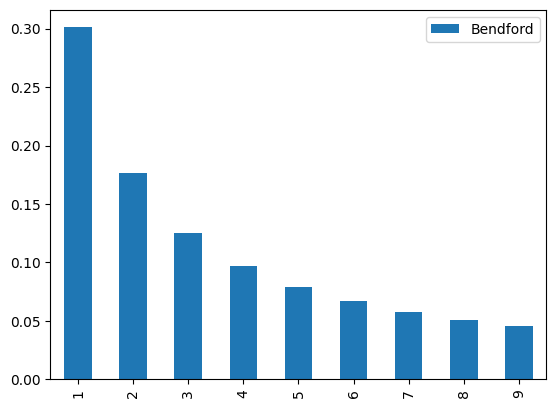

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pn = {'Ziffern': range(1,10), 'Bendford': np.log10([1 + 1/n for n in range(1,10)])}
df = pd.DataFrame(pn, columns=['Bendford'], index=pn['Ziffern'])
df.plot(kind='bar')
df

## Anwendungen

Das Bendfordsche Gesetz ermöglicht es Fäschungen aufzudecken. Man denke z.B. an
  * Bilanzen,
  * wissenschaftliche Versuchsreihen,
  * Abrechnungen

## Herleitung

Das Bendfordsche Gesetz gilt immer dann, wenn Zahlen eines Datensatzes mehrere Größenordnungen umfassen und in einem multiplikativen Verhältnis zueinander stehen, d.h., wenn es zwischen 1 und 2 so viele Daten gibt, wie zwischen 2 und 4 und wie zwischen 4 und 8. Dann sind die Zahlen nicht gleichverteilt, wohl aber die Mantissen ihrer Logarithmen.

Die Mantisse einer Zahl $x$ ist hier definiert als die Ziffern nach dem Komma.

$$ \langle x \rangle := x - \lfloor x \rfloor $$

Z.B. ist $\langle \pi \rangle = 0.14159\ldots$. Und weiter ist $\langle \log_{10}(x) \rangle = \langle \log_{10}(10^k \cdot x) \rangle, \; k \in \mathbb{Z}$.

### Mantissengesetz von Newcomb
Die Häufigkeit von Zahlen ist so, dass die Mantissen ihrer Logarithmen gleichverteilt sind.

Simon Newcomb: Note on the frequency of use of the different digits in natural numbers. Amer. J. Math. 4, 39–41 (1881)


### Folgerungen aus dem Mantissengesetz von Newcomb
Für die führende Dezimalziffer $i$ einer Zahl definieren wir

$$ E_i = \bigcup_{k \in \mathbb{Z}} \left[i\cdot 10^k,\; (i+1)\cdot 10^{k+1}\right[ $$

Dann ist $\mathbb{R}_+ = \bigcup_{i=1}^9 E_i$. Hat eine positive Dezimalzahl $x$ die führende Ziffer $i$, dann ist $x \in E_i$.

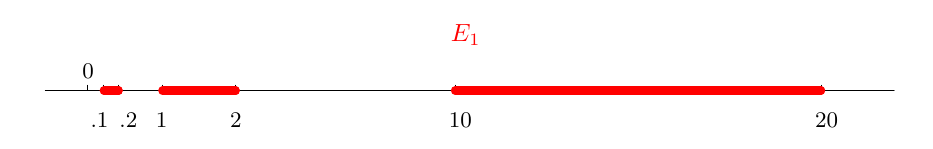

Sei nun $X$ eine Zufallsvariable, die Zufallszahlen erzeugt, die dem Mantissengeetz von Newcomb genügen. Dann ist $\langle \log_{10}(X) \rangle$ eine gleichverteilte Zufallsvariable und damit ist

$$ P(X \in E_i) = P\left(\langle \log_{10}(X) \rangle \in \left[\log_{10}(i),\;\log_{10}(i+1)\right[\right) = \log_{10}(i+1) - \log_{10}(i) $$ 

D.h. die führenden Ziffern von $X$ sind verteilt nach dem Bendfordschen Gesetz.

Wenn eine Zufallsvariable $X$ dem Mantissengesetz von Newcomb genügt, dann ist für $\lambda \neq 0$ auch

$$ \langle \log_{10}(\lambda \cdot X) \rangle = \langle \log_{10}(\lambda) + \log_{10}(X) \rangle $$

gleichverteilt. D.h., das Bendfordsche Gesetz ist skaleninvariant. Es ist also egal, in welcher Maßeinheit Messungen durchgeführt werden, z.B. Meter und Meilen, Kilogramm und Pfund, etc.

Siehe auch [Bachelorarbeit, Susanne Lack, Das Benfordsche Gesetz](https://www.mathe-museum.uni-passau.de/fileadmin/dokumente/fakultaeten/fim/lehrstuhl/forster-heinlein/Wie-Was-Warum/Benford/Bachelorarbeit_Das_Benfordsche_Gesetz_Susanne_Lack.pdf)

In [2]:
def führende_ziffer(zahl):
    return int(('%e' % abs(zahl))[0])

## Beispiel: Einwohnerzahl der Städte und Gemeinden in NRW
(Quelle: https://www.citypopulation.de/de/germany/nordrheinwestfalen/)

In [3]:
df_einw = pd.read_csv('einwohner_staedte_gemeinden_nrw.csv', delimiter='\t')
df_einw

,Name,Status,Kreis,Einwohner Schätzung 1995-12-31,Einwohner Schätzung 2001-12-31,Einwohner Zensus 2011-05-09,Einwohner Schätzung 2019-12-31
0,Aachen,Stadt,Städteregion Aachen,247923,245778,236420,248960
1,Ahaus,Stadt,Borken,34708,37533,38331,39381
2,Ahlen,Stadt,Warendorf,55785,55481,52280,52503
3,Aldenhoven,Gemeinde,Düren,13247,13911,13740,13787
4,Alfter,Gemeinde,Rhein-Sieg-Kreis,19351,21350,22839,23563
...,...,...,...,...,...,...,...
391,Wülfrath,Stadt,Mettmann,22046,22669,21213,20957
392,Wuppertal,Kreisfreie Stadt,Wuppertal,381884,364784,342661,355100
393,Würselen,Stadt,Städteregion Aachen,35758,36731,37206,38756
394,Xanten,Stadt,Wesel,18902,20841,21245,21607


,Bendford,Einwohner
1,0.301030,0.371212
2,0.176091,0.191919
3,0.124939,0.101010
4,0.096910,0.078283
5,0.079181,0.053030
6,0.066947,0.047980
7,0.057992,0.045455
8,0.051153,0.065657
9,0.045757,0.045455


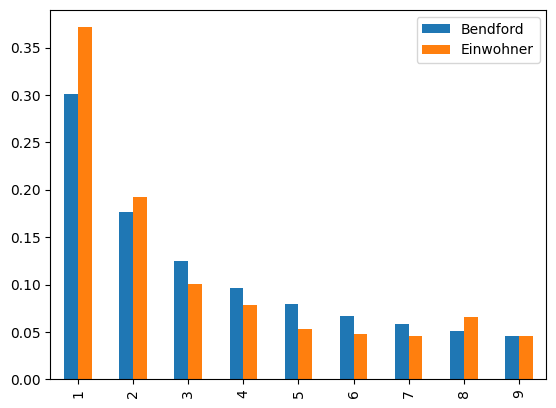

In [4]:
s = pd.Series([führende_ziffer(x) for x in df_einw['Einwohner Zensus 2011-05-09']]).value_counts(normalize=True).sort_index()
df['Einwohner'] = s
df.plot(kind = 'bar')
df

## Beispiel: Länge von zufälligen Wikipedia-Artikeln

Wir rufen 1000 zufällige Wikipedia-Artikel ab und merken uns die erste Ziffer der Länge.

In [5]:
import urllib
from bs4 import BeautifulSoup

n = 100
ziffern_haeufigkeit = [0]*9
for _ in range(n):
    seite = urllib.request.urlopen('https://de.wikipedia.org/wiki/Spezial:Zuf%C3%A4llige_Seite')
    soup = BeautifulSoup(seite.read())
    laenge = sum(len(s.getText()) for s in soup.find_all('p'))
    ziffer = führende_ziffer(laenge)
    ziffern_haeufigkeit[ziffer-1] += 1

ziffern_haeufigkeit = np.array(ziffern_haeufigkeit)/n

,Bendford,Einwohner,Wikipedia
1,0.301030,0.371212,0.42
2,0.176091,0.191919,0.23
3,0.124939,0.101010,0.09
4,0.096910,0.078283,0.05
5,0.079181,0.053030,0.05
6,0.066947,0.047980,0.02
7,0.057992,0.045455,0.04
8,0.051153,0.065657,0.07
9,0.045757,0.045455,0.03


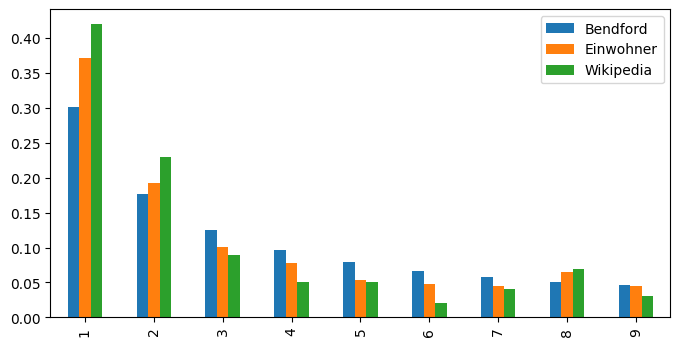

In [7]:
df['Wikipedia'] = ziffern_haeufigkeit
df.plot(kind = 'bar', figsize=(8,4))
df

## Beispiel

(Siehe Zucchini, Schlegel, Nenadić, Sperlich; Statistik für Bachelor- und Masterstudenten)

Beobachtete und erwartete Häufigkeiten der ersten Stelle von 1000 Kasseneinträgen:

| Ziffer  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|---|---|---|---|---|---|---|---|---|---|
| $H_i^b$  | 284  | 197  | 132  | 98  | 69  | 67  | 47  | 62  | 44  |
| $H_i^e$  | 301  | 176  | 125  | 97  | 79  | 67  | 58  | 51  | 46  |

### Hypothesen

$$ H_0:\;\text{Benford gilt}, \quad H_1:\;\text{Benford gilt nicht} $$

### Würde das Finanzamt bei einer Irrtumswahrscheinlichkeit von 10% prüfen?

Es ist also $1-\alpha = 0.9$. Wir berechnen die Prüfgröße

$$ \operatorname{PG}_{\chi^2} = \sum_{i=1}^9 \frac{(H_i^b - H_i^e)^2}{H_i^e} = \frac{(284-301)^2}{301} + \ldots +  \frac{(44-46)^2}{46} \approx 9.68 $$

Laut [Tabelle](https://de.wikibooks.org/wiki/Statistik:_Tabelle_der_Chi-Quadrat-Verteilung)  ist

$$ \chi^2_{8,0.9} = 13.36 > 9.68 = \operatorname{PG}_{\chi^2}  $$

Das heißt, die Prüfgröße fällt in den Annahmebereich, $H_0$ wird nicht verworfen.

In [8]:
Hb = np.array([284, 197, 132, 98, 69, 67, 47, 62, 44])
He = np.array([301, 176, 125, 97, 79, 67, 58, 51, 46])
print("PG = %.02f" % sum(((Hb-He)**2/He)))

PG = 9.68
